In [8]:
import matplotlib.pyplot as plt
import open3d as o3d
import laspy
import numpy as np

In [4]:
pc1 = laspy.read("constructn_floor1.laz")
pc1

<LasData(1.2, point fmt: <PointFormat(3, 0 bytes of extra dims)>, 16152697 points, 2 vlrs)>

In [5]:
xyz = np.vstack((pc1.x, pc1.y, pc1.z)).transpose()
xyz

array([[3.85385990e+05, 2.04980961e+06, 5.73620000e+02],
       [3.85385960e+05, 2.04980958e+06, 5.73630000e+02],
       [3.85385990e+05, 2.04980961e+06, 5.73620000e+02],
       ...,
       [3.85395410e+05, 2.04978844e+06, 5.70990000e+02],
       [3.85396530e+05, 2.04978823e+06, 5.71040000e+02],
       [3.85386120e+05, 2.04979791e+06, 5.70930000e+02]])

In [6]:
xyz.shape

(16152697, 3)

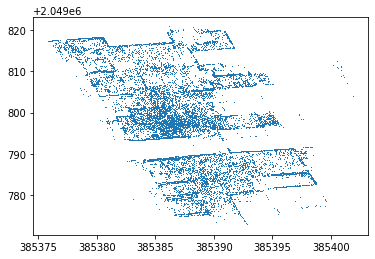

In [9]:
plt.plot(xyz[::1000,0], xyz[::1000,1], ',')

In [14]:
# Convert numpy array to Open3D point cloud

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)
print('pcd:', pcd)

pcd: PointCloud with 16152697 points.


In [15]:
o3d.visualization.draw_geometries([pcd])

In [16]:
pcd_1m = pcd.voxel_down_sample(voxel_size=1)
print('pcd_1m: ', pcd_1m)

pcd_1m:  PointCloud with 2020 points.


In [17]:
o3d.visualization.draw_geometries([pcd_1m])

In [18]:
pcd_1m.estimate_normals(
    o3d.geometry.KDTreeSearchParamHybrid(radius=2, max_nn=18))
pcd_1m.orient_normals_to_align_with_direction([0., 0., 1.])

In [19]:
o3d.visualization.draw_geometries([pcd_1m])

In [20]:
# Convert the .laz file to an Open3D point cloud object
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(np.vstack((pc1.x, pc1.y, pc1.z)).T)

In [12]:
# Save the Open3D point cloud object as a .ply file
o3d.io.write_point_cloud("constructn_floor1.ply", pcd)

True

In [28]:
# Load the point cloud
pcd = o3d.io.read_point_cloud("constructn_floor1.ply")

In [29]:
# Segment plane using RANSAC
plane_model, inliers = pcd.segment_plane(distance_threshold=0.1, ransac_n=3, num_iterations=1000)

In [30]:
# Extract inliers and outliers
inlier_cloud = pcd.select_by_index(inliers)
outlier_cloud = pcd.select_by_index(inliers, invert=True)

In [31]:
# Visualize the result
inlier_cloud.paint_uniform_color([1, 0, 0])
outlier_cloud.paint_uniform_color([0.6, 0.6, 0.6])
o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud])

In [27]:
# Cluster the remaining points using DBSCAN
with o3d.utility.VerbosityContextManager(o3d.utility.VerbosityLevel.Debug) as cm:
    labels = np.array(outlier_cloud.cluster_dbscan(eps=0.2, min_points=10, print_progress=True))


In [ ]:
max_label = labels.max()

colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))

outlier_cloud.colors = o3d.utility.Vector3dVector(colors[:, :3])